# GEOG0125

## Task 2 Machine Learning (Topic)

## 2 Machine Learning Model

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 41.3 MB/s eta 0:00:00


In [4]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 47.8 MB/s eta 0:00:00


In [5]:
## Install packages

# python standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
import contextily as cx
import os 

# sklearn standard functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# standard tensorflow.keras functions
from tensorflow import keras

# standard imports for pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torch import Tensor

# torchvision imports
import torchvision
from torchvision.io import read_image
import torchvision.transforms as transforms
from torchvision import datasets, models

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
## Import dataset after labelling manually
train_low = list(os.listdir('/content/drive/MyDrive/GEOG0125_ML/trainset/Low'))
train_high = list(os.listdir('/content/drive/MyDrive/GEOG0125_ML/trainset/High'))
test_low = list(os.listdir('/content/drive/MyDrive/GEOG0125_ML/testset/low'))
test_high = list(os.listdir('/content/drive/MyDrive/GEOG0125_ML/testset/high'))

In [10]:
# Data Labelling
df_train_low = pd.DataFrame(train_low)
df_train_low['greenery']=0
df_train_high = pd.DataFrame(train_high)
df_train_high['greenery']=1
df_test_low = pd.DataFrame(test_low)
df_test_low['greenery']=0
df_test_high = pd.DataFrame(test_high)
df_test_high['greenery']=1

df_train_low.head()

0  greenery
0   gsv_247.jpg         0
1   gsv_674.jpg         0
2   gsv_709.jpg         0
3  gsv_1850.jpg         0
4  gsv_1769.jpg         0

In [11]:
df_train = pd.concat([df_train_low,df_train_high])
df_train.columns=['0','greenery']

df_test = pd.concat([df_test_low,df_test_high])
df_test.columns=['0','greenery']

In [12]:
df_train.rename(columns={'0': 'imgID'}, inplace=True)
df_test.rename(columns={'0': 'imgID'}, inplace=True)
df_train.head()

imgID  greenery
0   gsv_247.jpg         0
1   gsv_674.jpg         0
2   gsv_709.jpg         0
3  gsv_1850.jpg         0
4  gsv_1769.jpg         0

In [13]:
df_train['index'] = df_train['imgID'].str.extract('(\d+)').astype(int)
df_test['index'] = df_test['imgID'].str.extract('(\d+)').astype(int)
df_train.head()

imgID  greenery  index
0   gsv_247.jpg         0    247
1   gsv_674.jpg         0    674
2   gsv_709.jpg         0    709
3  gsv_1850.jpg         0   1850
4  gsv_1769.jpg         0   1769

In [14]:
# import sample locations
sl = pd.read_csv('Cambridge_drive.csv')
sl.head()

lat       lon
0  52.199699  0.133750
1  52.200488  0.136126
2  52.210094  0.083694
3  52.193669  0.157824
4  52.185927  0.138019

In [15]:
sl = sl.reset_index()
sl.head()

index        lat       lon
0      0  52.199699  0.133750
1      1  52.200488  0.136126
2      2  52.210094  0.083694
3      3  52.193669  0.157824
4      4  52.185927  0.138019

In [16]:
# add locations to corresponding images in df_train and df_test
df_train = pd.merge(df_train, sl, on='index')
df_train.to_csv('greenery_train.csv',index=False,header=False)

df_test = pd.merge(df_test, sl, on='index')
df_test.to_csv('greenery_test.csv',index=False,header=False)

In [17]:
df_test

imgID  greenery  index        lat       lon
0     gsv_841.jpg         0    841  52.208622  0.167417
1    gsv_3031.jpg         0   3031  52.189540  0.169924
2    gsv_1925.jpg         0   1925  52.214177  0.079060
3    gsv_2521.jpg         0   2521  52.226830  0.111804
4     gsv_558.jpg         0    558  52.215357  0.117695
..            ...       ...    ...        ...       ...
561  gsv_1262.jpg         1   1262  52.226287  0.143494
562  gsv_2077.jpg         1   2077  52.171252  0.114127
563   gsv_722.jpg         1    722  52.198192  0.128386
564  gsv_2469.jpg         1   2469  52.216392  0.170305
565   gsv_436.jpg         1    436  52.227108  0.110856

[566 rows x 5 columns]

In [18]:
!mkdir all_train
!mkdir all_test

In [19]:
!cp /content/drive/MyDrive/GEOG0125_ML/trainset/Low/*.jpg /content/drive/MyDrive/GEOG0125_ML/all_train
!cp /content/drive/MyDrive/GEOG0125_ML/trainset/High/*.jpg /content/drive/MyDrive/GEOG0125_ML/all_train
!cp /content/drive/MyDrive/GEOG0125_ML/testset/low/*.jpg /content/drive/MyDrive/GEOG0125_ML/all_test
!cp /content/drive/MyDrive/GEOG0125_ML/testset/high/*.jpg /content/drive/MyDrive/GEOG0125_ML/all_test

Create two Torch dataset, train and test data using the CustomImageDataset class adapted from pytorch tutorial https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [20]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image.float())
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [21]:
transform = transforms.Compose(
    [
      transforms.CenterCrop(224),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
     ])

inv_normalize = transforms.Normalize(
   mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
   std=[1/0.229, 1/0.224, 1/0.225]
)

In [22]:
## Create training and testing dataset
train_dataset=CustomImageDataset('greenery_train.csv', '/content/drive/MyDrive/GEOG0125_ML/all_train/', transform=transform)
test_dataset=CustomImageDataset('greenery_test.csv', '/content/drive/MyDrive/GEOG0125_ML/all_test/', transform=transform)

In [23]:
print(len(train_dataset))
print(len(test_dataset))

2258
565


In [24]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=24, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=24, shuffle=True)

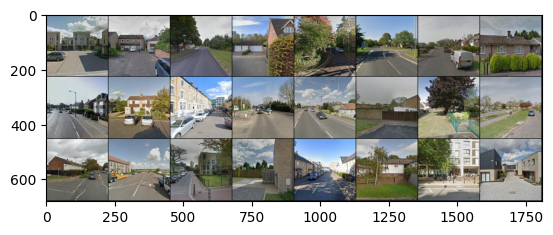

labels: [0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0]


In [30]:
## Plot a sample of images from the train set together with their labels

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)
inv_images = inv_normalize(images)

# show images
imshow(torchvision.utils.make_grid(inv_images.int()))
# print labels
print(f'labels: {labels.numpy()}')

In [31]:
## Get the pretrained-model (VGG11)
num_classes=2
feature_extract = True
use_pretrained = True

def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

model_ft = models.vgg11_bn(pretrained=use_pretrained)
set_parameter_requires_grad(model_ft, feature_extract)
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
input_size = 224

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:05<00:00, 94.3MB/s]


In [33]:
## Model Training

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    train_loss, train_correct = 0, 0

    #for batch, (X, y) in enumerate(dataloader):
    for X, y in dataloader:
        # push to device
        X = X.to(device)
        y = y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
         
        # save loss and accuracy
        train_loss += loss.item()
        train_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        
    train_loss = train_loss/num_batches
    train_correct = train_correct/size
    print(f"Train_set: \n Accuracy: {(100*train_correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")
    train_loss_array.append(train_loss)
    train_correct_array.append(train_correct)

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, test_correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # push to device
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss = test_loss/num_batches
    test_correct = test_correct /size
    print(f"Test_set: \n Accuracy: {(100*test_correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    test_loss_array.append(test_loss)
    test_correct_array.append(test_correct)

In [32]:
## cast the model to device ('cpu' or 'gpu')
model_ft1 = model_ft.to(device)

In [34]:
## Model1: Setup the loss function (classification), optimiser and the training and testing loop.

epochs1 = 20
learning_rate1 = 0.001
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(model_ft1.parameters(), lr=learning_rate1, momentum=0.9)

In [37]:
# Fine-tune pretrained_model with training data and keep track of the loss and accuracy.

# initialise
train_loss_array=[]
test_loss_array=[]
train_correct_array=[]
test_correct_array=[]

for t in range(epochs1):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model_ft1, criterion, optimizer1)
    test_loop(test_dataloader, model_ft1, criterion)
print("Done!")

Epoch 1
-------------------------------
Train_set: 
 Accuracy: 78.7%, Avg loss: 0.436628 

Test_set: 
 Accuracy: 77.5%, Avg loss: 0.487081 

Epoch 2
-------------------------------
Train_set: 
 Accuracy: 78.6%, Avg loss: 0.454150 

Test_set: 
 Accuracy: 71.2%, Avg loss: 0.628759 

Epoch 3
-------------------------------
Train_set: 
 Accuracy: 79.1%, Avg loss: 0.447149 

Test_set: 
 Accuracy: 74.5%, Avg loss: 0.531274 

Epoch 4
-------------------------------
Train_set: 
 Accuracy: 79.8%, Avg loss: 0.428423 

Test_set: 
 Accuracy: 76.6%, Avg loss: 0.463442 

Epoch 5
-------------------------------
Train_set: 
 Accuracy: 78.9%, Avg loss: 0.442954 

Test_set: 
 Accuracy: 76.1%, Avg loss: 0.497573 

Epoch 6
-------------------------------
Train_set: 
 Accuracy: 78.0%, Avg loss: 0.454907 

Test_set: 
 Accuracy: 76.1%, Avg loss: 0.527532 

Epoch 7
-------------------------------
Train_set: 
 Accuracy: 79.7%, Avg loss: 0.454900 

Test_set: 
 Accuracy: 74.9%, Avg loss: 0.509768 

Epoch 8
-----

minimal test loss:0.4438010137528181


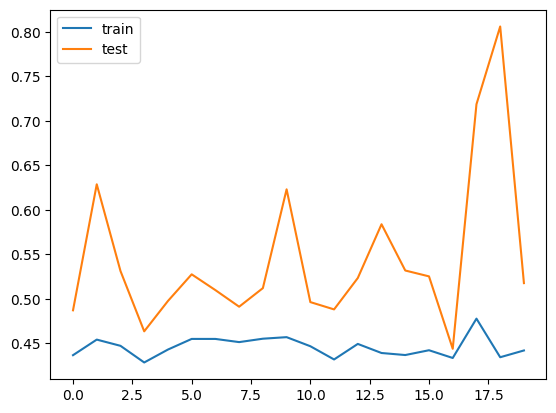

In [38]:
# Plot the loss and accuracy schedule of the model

loss_array1 = zip(train_loss_array,test_loss_array)
loss_df1=pd.DataFrame(loss_array1,columns=['train','test'])
loss_df1.plot()
print('minimal test loss:' + str(np.min(test_loss_array)))

maximum test acc:0.8070796460176991


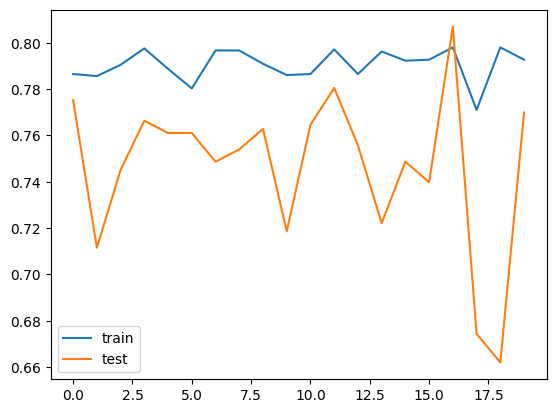

In [39]:
acc_array1 = zip(train_correct_array,test_correct_array)
acc_df1=pd.DataFrame(acc_array1,columns=['train','test'])
acc_df1.plot()
print('maximum test acc:' + str(np.max(test_correct_array)))

In [40]:
## Model2: Setup the loss function (classification), optimiser and the training and testing loop.
model_ft2 = model_ft.to(device)
epochs2 = 15
learning_rate2 = 0.001
criterion = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(model_ft2.parameters(), lr=learning_rate2, momentum=0.9)

In [41]:
# Fine-tune pretrained_model with training data and keep track of the loss and accuracy.

# initialise
train_loss_array=[]
test_loss_array=[]
train_correct_array=[]
test_correct_array=[]

for t in range(epochs2):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model_ft2, criterion, optimizer2)
    test_loop(test_dataloader, model_ft2, criterion)
print("Done!")

Epoch 1
-------------------------------
Train_set: 
 Accuracy: 80.2%, Avg loss: 0.429216 

Test_set: 
 Accuracy: 71.0%, Avg loss: 0.594282 

Epoch 2
-------------------------------
Train_set: 
 Accuracy: 80.3%, Avg loss: 0.432282 

Test_set: 
 Accuracy: 77.3%, Avg loss: 0.494483 

Epoch 3
-------------------------------
Train_set: 
 Accuracy: 78.9%, Avg loss: 0.451723 

Test_set: 
 Accuracy: 76.1%, Avg loss: 0.495828 

Epoch 4
-------------------------------
Train_set: 
 Accuracy: 80.1%, Avg loss: 0.422931 

Test_set: 
 Accuracy: 74.0%, Avg loss: 0.565810 

Epoch 5
-------------------------------
Train_set: 
 Accuracy: 79.8%, Avg loss: 0.449316 

Test_set: 
 Accuracy: 74.2%, Avg loss: 0.592874 

Epoch 6
-------------------------------
Train_set: 
 Accuracy: 79.1%, Avg loss: 0.445469 

Test_set: 
 Accuracy: 73.8%, Avg loss: 0.561632 

Epoch 7
-------------------------------
Train_set: 
 Accuracy: 79.6%, Avg loss: 0.438801 

Test_set: 
 Accuracy: 73.6%, Avg loss: 0.522529 

Epoch 8
-----

minimal test loss:0.47062670687834424


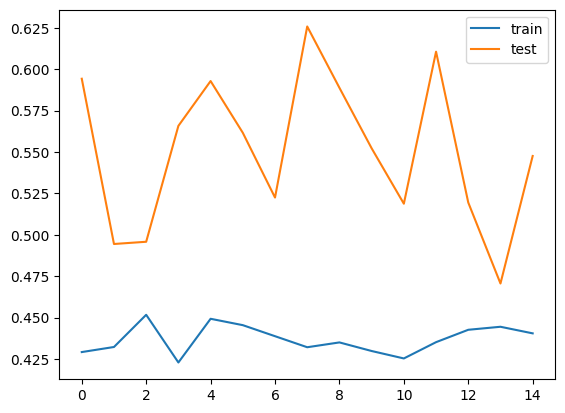

In [42]:
# Plot the loss and accuracy schedule of the model

loss_array2 = zip(train_loss_array,test_loss_array)
loss_df2=pd.DataFrame(loss_array2,columns=['train','test'])
loss_df2.plot()
print('minimal test loss:' + str(np.min(test_loss_array)))

maximum test acc:0.7734513274336283


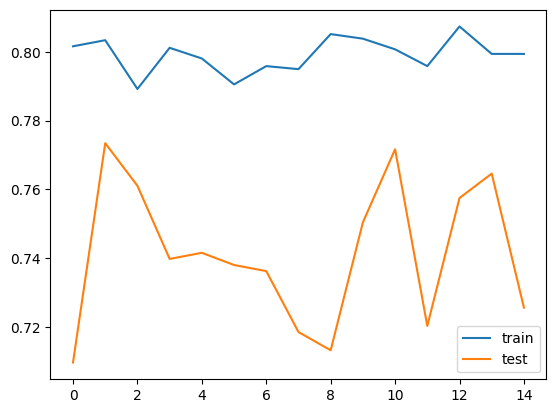

In [43]:
acc_array2 = zip(train_correct_array,test_correct_array)
acc_df2=pd.DataFrame(acc_array2,columns=['train','test'])
acc_df2.plot()
print('maximum test acc:' + str(np.max(test_correct_array)))

In [44]:
## Model3: Setup the loss function (classification), optimiser and the training and testing loop.

epochs3 = 20
learning_rate3 = 0.005
criterion = nn.CrossEntropyLoss()
optimizer3 = optim.SGD(model_ft.parameters(), lr=learning_rate3, momentum=0.9)

In [45]:
# Fine-tune pretrained_model with training data and keep track of the loss and accuracy.
model_ft3 = model_ft.to(device)
# initialise
train_loss_array=[]
test_loss_array=[]
train_correct_array=[]
test_correct_array=[]

for t in range(epochs3):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model_ft3, criterion, optimizer3)
    test_loop(test_dataloader, model_ft3, criterion)
print("Done!")

Epoch 1
-------------------------------
Train_set: 
 Accuracy: 74.8%, Avg loss: 0.546593 

Test_set: 
 Accuracy: 78.1%, Avg loss: 0.507701 

Epoch 2
-------------------------------
Train_set: 
 Accuracy: 76.5%, Avg loss: 0.620278 

Test_set: 
 Accuracy: 77.5%, Avg loss: 0.522088 

Epoch 3
-------------------------------
Train_set: 
 Accuracy: 75.6%, Avg loss: 0.634895 

Test_set: 
 Accuracy: 74.3%, Avg loss: 0.743399 

Epoch 4
-------------------------------
Train_set: 
 Accuracy: 74.6%, Avg loss: 0.694495 

Test_set: 
 Accuracy: 76.8%, Avg loss: 0.619815 

Epoch 5
-------------------------------
Train_set: 
 Accuracy: 73.6%, Avg loss: 0.807262 

Test_set: 
 Accuracy: 71.0%, Avg loss: 0.757385 

Epoch 6
-------------------------------
Train_set: 
 Accuracy: 74.7%, Avg loss: 0.701819 

Test_set: 
 Accuracy: 72.4%, Avg loss: 0.793274 

Epoch 7
-------------------------------
Train_set: 
 Accuracy: 76.0%, Avg loss: 0.674972 

Test_set: 
 Accuracy: 67.8%, Avg loss: 1.109907 

Epoch 8
-----

minimal test loss:0.5077006034553051


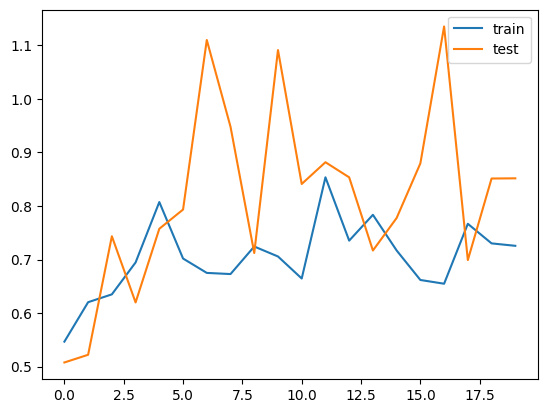

In [46]:
# Plot the loss and accuracy schedule of the model

loss_array3 = zip(train_loss_array,test_loss_array)
loss_df3=pd.DataFrame(loss_array3,columns=['train','test'])
loss_df3.plot()
print('minimal test loss:' + str(np.min(test_loss_array)))

maximum test acc:0.7805309734513274


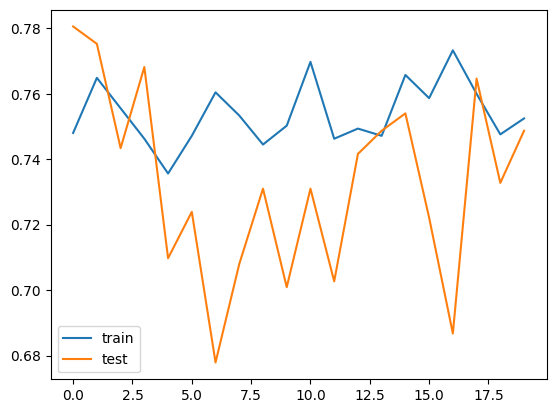

In [47]:
acc_array3 = zip(train_correct_array,test_correct_array)
acc_df3=pd.DataFrame(acc_array3,columns=['train','test'])
acc_df3.plot()
print('maximum test acc:' + str(np.max(test_correct_array)))

In [48]:
## Model4: Setup the loss function (classification), optimiser and the training and testing loop.

epochs4 = 20
learning_rate4 = 0.01
criterion = nn.CrossEntropyLoss()
optimizer4 = optim.SGD(model_ft.parameters(), lr=learning_rate4, momentum=0.9)

In [49]:
# Fine-tune pretrained_model with training data and keep track of the loss and accuracy.
model_ft4 = model_ft.to(device)
# initialise
train_loss_array=[]
test_loss_array=[]
train_correct_array=[]
test_correct_array=[]

for t in range(epochs3):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model_ft4, criterion, optimizer4)
    test_loop(test_dataloader, model_ft4, criterion)
print("Done!")

Epoch 1
-------------------------------
Train_set: 
 Accuracy: 74.8%, Avg loss: 0.856083 

Test_set: 
 Accuracy: 60.7%, Avg loss: 1.865626 

Epoch 2
-------------------------------
Train_set: 
 Accuracy: 74.3%, Avg loss: 0.995826 

Test_set: 
 Accuracy: 71.2%, Avg loss: 1.192334 

Epoch 3
-------------------------------
Train_set: 
 Accuracy: 74.2%, Avg loss: 1.112340 

Test_set: 
 Accuracy: 73.5%, Avg loss: 1.167898 

Epoch 4
-------------------------------
Train_set: 
 Accuracy: 74.5%, Avg loss: 1.142933 

Test_set: 
 Accuracy: 69.0%, Avg loss: 1.465640 

Epoch 5
-------------------------------
Train_set: 
 Accuracy: 73.4%, Avg loss: 1.292474 

Test_set: 
 Accuracy: 70.6%, Avg loss: 1.462341 

Epoch 6
-------------------------------
Train_set: 
 Accuracy: 74.5%, Avg loss: 1.158750 

Test_set: 
 Accuracy: 70.4%, Avg loss: 1.308799 

Epoch 7
-------------------------------
Train_set: 
 Accuracy: 72.7%, Avg loss: 1.195275 

Test_set: 
 Accuracy: 72.7%, Avg loss: 1.330945 

Epoch 8
-----

minimal test loss:1.1678980359186728


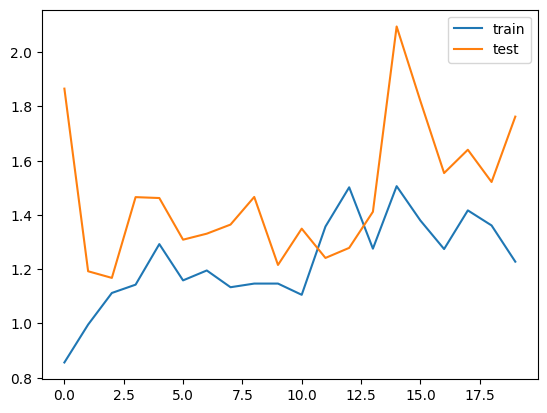

In [50]:
# Plot the loss and accuracy schedule of the model

loss_array4 = zip(train_loss_array,test_loss_array)
loss_df4=pd.DataFrame(loss_array4,columns=['train','test'])
loss_df4.plot()
print('minimal test loss:' + str(np.min(test_loss_array)))

maximum test acc:0.7469026548672566


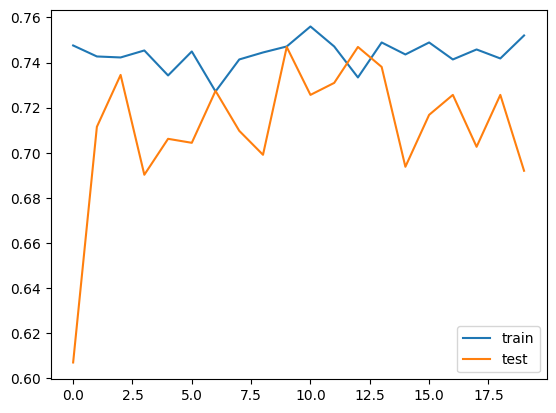

In [51]:
acc_array4 = zip(train_correct_array,test_correct_array)
acc_df4=pd.DataFrame(acc_array4,columns=['train','test'])
acc_df4.plot()
print('maximum test acc:' + str(np.max(test_correct_array)))

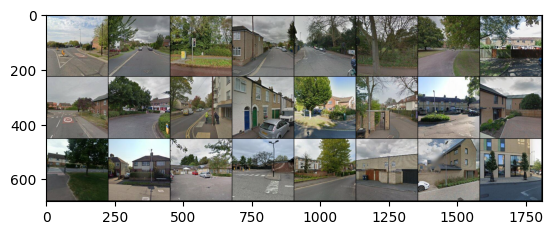

labels: [1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0]
pred: [0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
number of correct: 19
number of incorrect: 5


In [57]:
## Plot a batch of images with its label (actual) class and predicted class

# get some random training images
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
pred = model_ft1(images.cuda())

# show images
inv_images = inv_normalize(images)
imshow(torchvision.utils.make_grid(inv_images.int()))

# print labels
y_obs = labels.numpy()
y_pred = np.argmax(pred.detach().cpu().numpy(),axis=1)
print(f'labels: {y_obs}')
print(f'pred: {y_pred}')
print(f'number of correct: {np.sum(y_obs==y_pred)}') 
print(f'number of incorrect: {np.sum(y_obs!=y_pred)}') 

In [58]:
# get predicted labels for all images in test dataset

preds = []
with torch.no_grad():
    for X, y in test_dataloader:
        X = X.to(device)
        y = y.to(device)
        pred = model_ft1(X)
        preds.append(pred.argmax(dim=1).cpu().numpy())
preds = np.concatenate(preds)

In [59]:
preds

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [60]:
preds = pd.DataFrame(preds, columns=['predict'])
df_test_pred = pd.concat([df_test, preds], axis=1)
df_test_pred.to_csv('greenery_test_pred.csv', index=False)

## 3 Data Visualization

In [61]:
## Spatial visualisation of comparison between original label and predicted label on testset

# Convert the df_test_pred to a geopandas GeoDataFrame
geometry = gpd.points_from_xy(df_test_pred['lon'], df_test_pred['lat'])
gdf = gpd.GeoDataFrame(df_test_pred, geometry=geometry)
gdf.head()

imgID  greenery  index        lat       lon  predict  \
0   gsv_841.jpg         0    841  52.208622  0.167417      0.0   
1  gsv_3031.jpg         0   3031  52.189540  0.169924      1.0   
2  gsv_1925.jpg         0   1925  52.214177  0.079060      1.0   
3  gsv_2521.jpg         0   2521  52.226830  0.111804      1.0   
4   gsv_558.jpg         0    558  52.215357  0.117695      1.0   

                   geometry  
0  POINT (0.16742 52.20862)  
1  POINT (0.16992 52.18954)  
2  POINT (0.07906 52.21418)  
3  POINT (0.11180 52.22683)  
4  POINT (0.11769 52.21536)

In [62]:
print(gdf.crs)

None


In [63]:
gdf = gdf.set_crs(epsg=4326)

In [64]:
gdf = gdf.to_crs(epsg=3857)

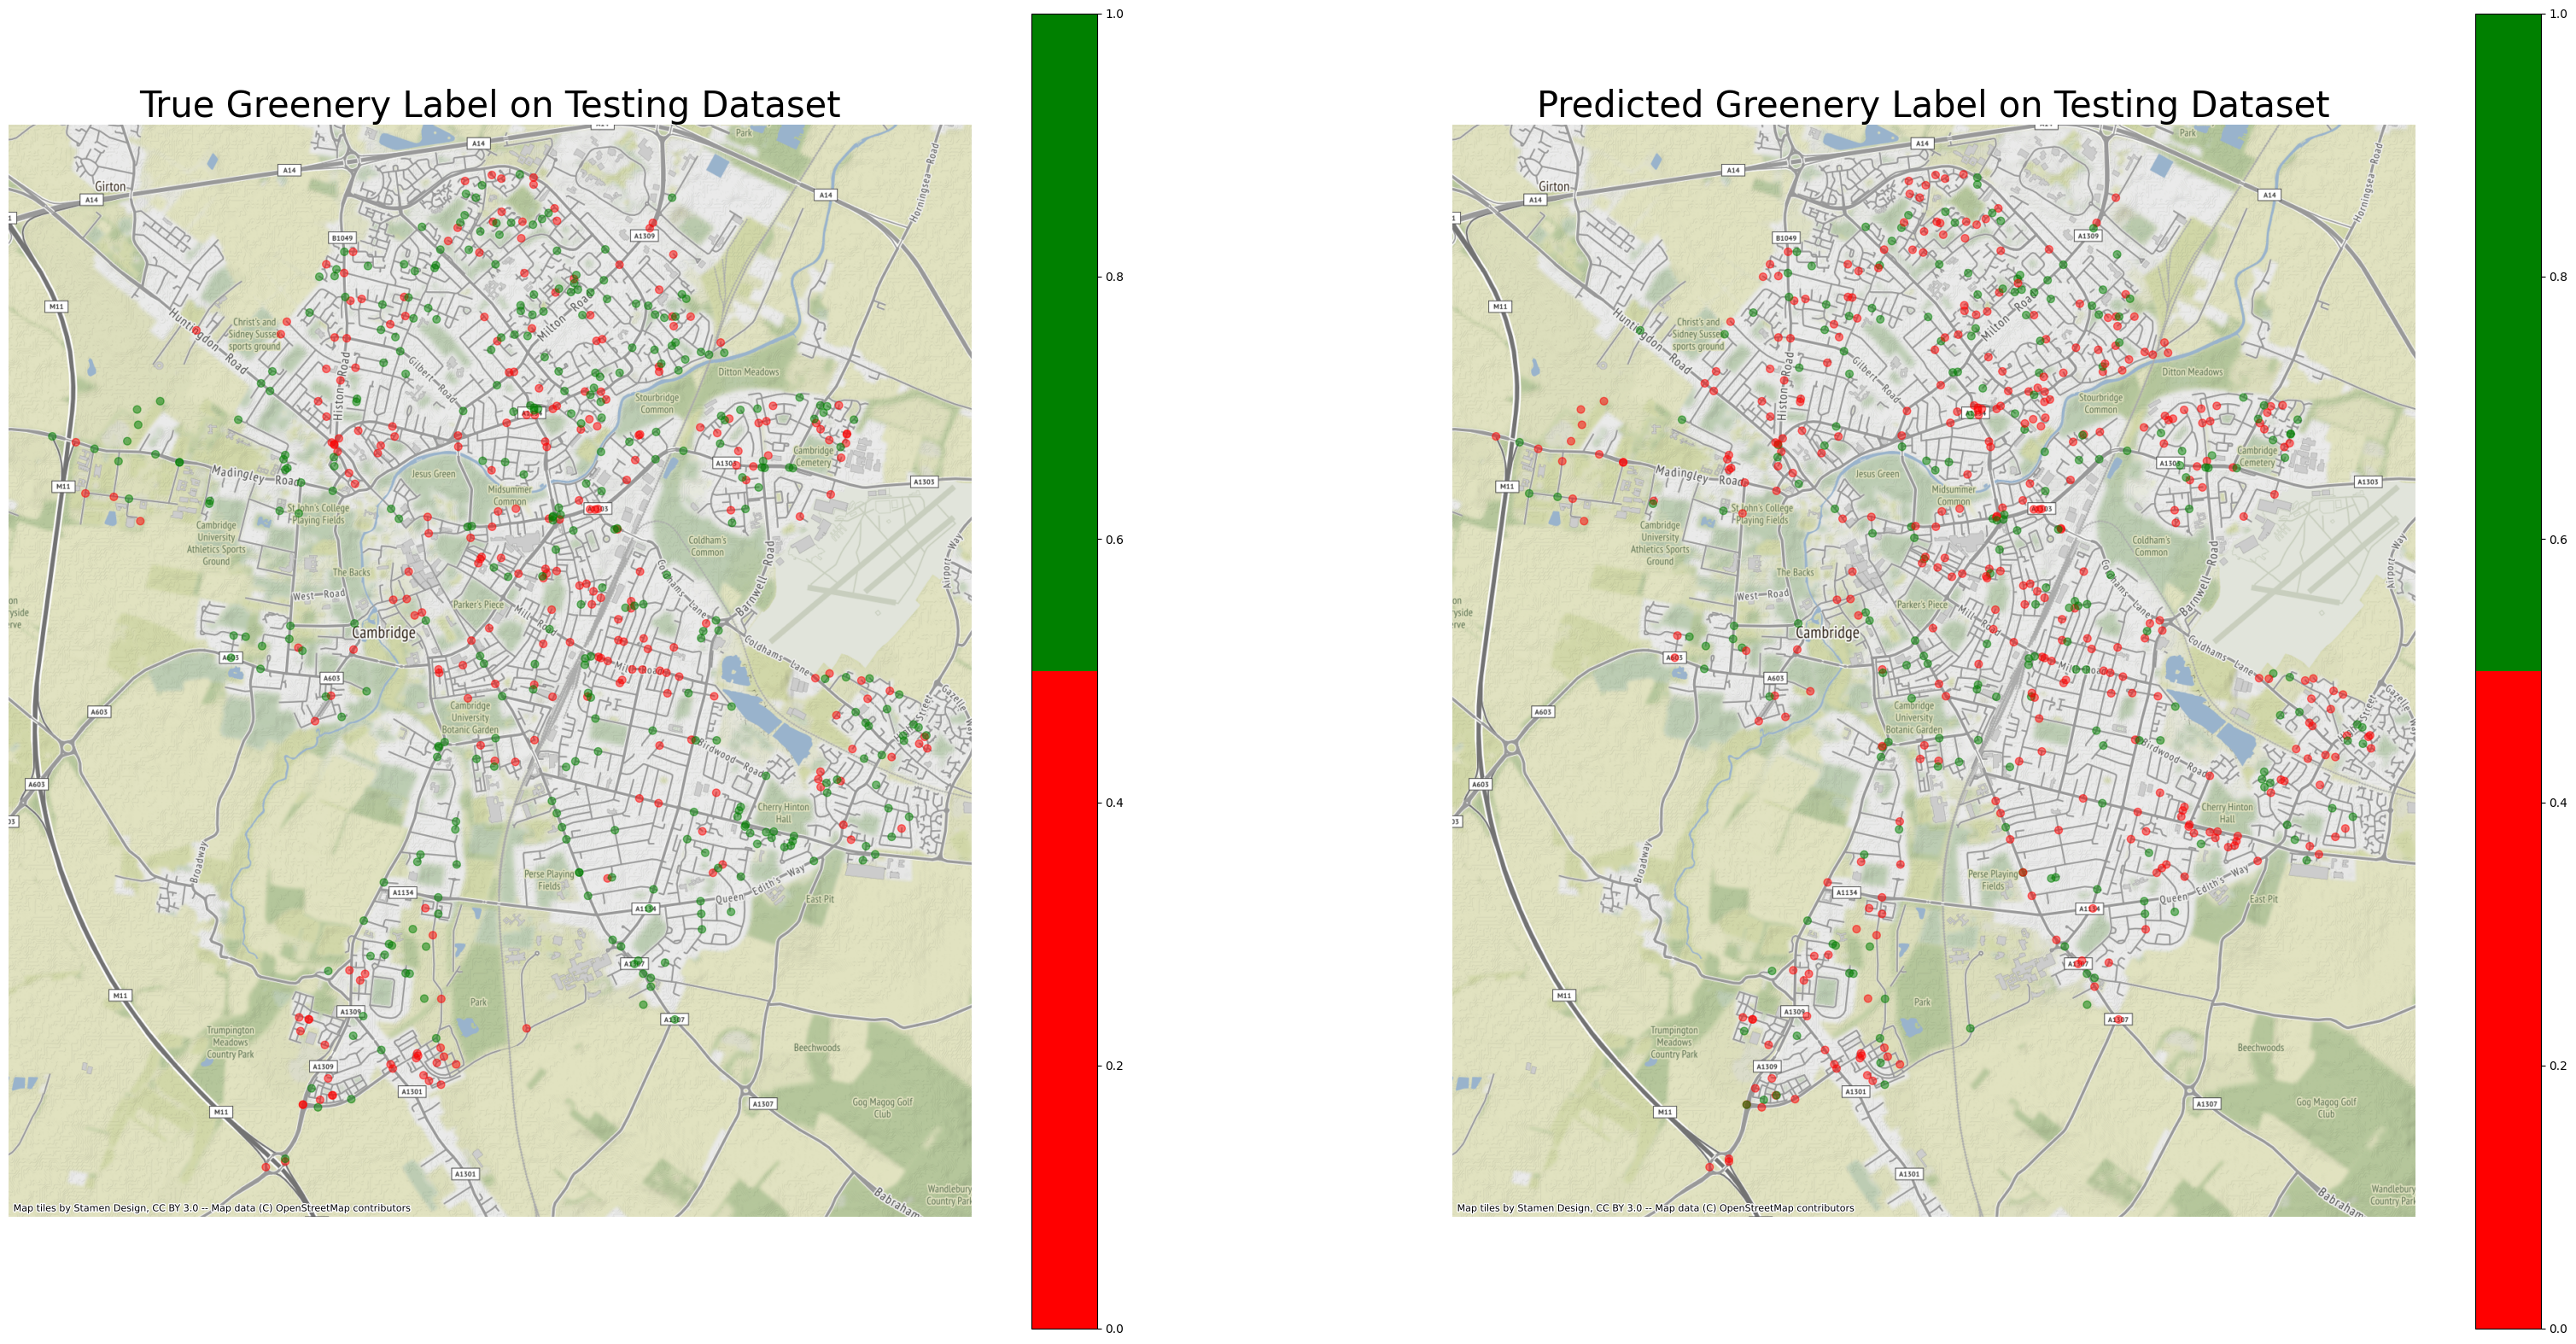

In [65]:
# multiple sub-figures
fig, axs = plt.subplots(1, 2, figsize=(40, 20))

# Define a custom colormap
cmap = ListedColormap(['red', 'green'])

# Plot the first subplot - original greenery label
gdf.plot(column='greenery', cmap=cmap, markersize=40,alpha=0.5, ax=axs[0], legend=True)
axs[0].set_title('True Greenery Label on Testing Dataset',fontsize=30)
cx.add_basemap(axs[0], crs=gdf.crs.to_string())
axs[0].axis('off')

# Plot the second subplot - predicted greenery label
gdf.plot(column='predict', cmap=cmap, markersize=40,alpha=0.5, ax=axs[1], legend=True)
axs[1].set_title('Predicted Greenery Label on Testing Dataset',fontsize=30)
cx.add_basemap(axs[1], crs=gdf.crs.to_string())
axs[1].axis('off')

# Show the figure
plt.show()


In [66]:
## Spatial visualisation of greenery in Cambridge
df = pd.concat([df_train, df_test])
df.head()

imgID  greenery  index        lat       lon
0   gsv_247.jpg         0    247  52.166968  0.122018
1   gsv_674.jpg         0    674  52.169670  0.108868
2   gsv_709.jpg         0    709  52.230972  0.131635
3  gsv_1850.jpg         0   1850  52.194408  0.156780
4  gsv_1769.jpg         0   1769  52.227601  0.114703

In [67]:
geometry1 = gpd.points_from_xy(df['lon'], df['lat'])
gdf1 = gpd.GeoDataFrame(df, geometry=geometry1)
print(gdf1.crs)
gdf1.head()

None


imgID  greenery  index        lat       lon  \
0   gsv_247.jpg         0    247  52.166968  0.122018   
1   gsv_674.jpg         0    674  52.169670  0.108868   
2   gsv_709.jpg         0    709  52.230972  0.131635   
3  gsv_1850.jpg         0   1850  52.194408  0.156780   
4  gsv_1769.jpg         0   1769  52.227601  0.114703   

                   geometry  
0  POINT (0.12202 52.16697)  
1  POINT (0.10887 52.16967)  
2  POINT (0.13164 52.23097)  
3  POINT (0.15678 52.19441)  
4  POINT (0.11470 52.22760)

In [68]:
len(gdf1)

2825

In [69]:
gdf1 = gdf1.set_crs(epsg=4326)

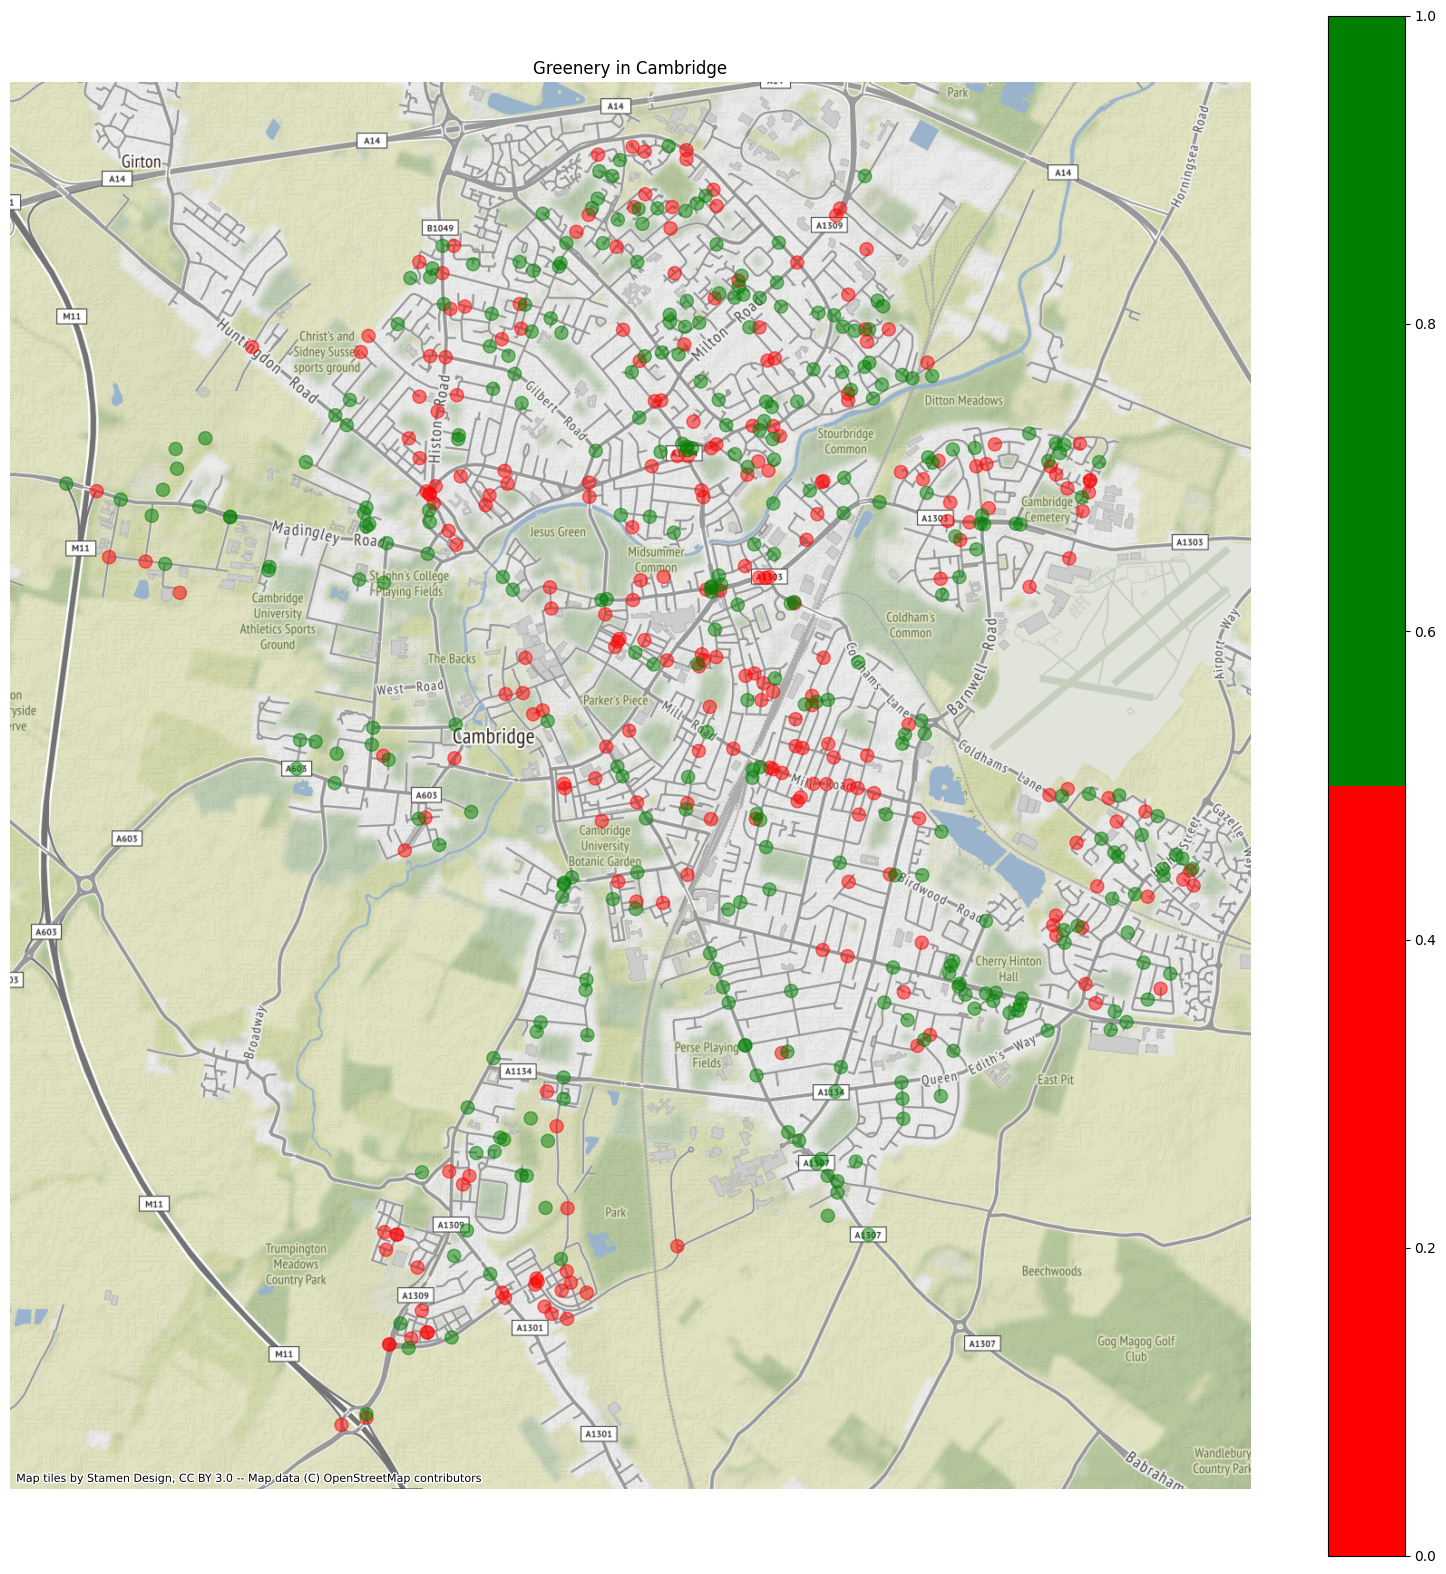

In [70]:
gdf1 = gdf1.to_crs(epsg=3857)

# Create a Matplotlib figure and axis object
fig, ax = plt.subplots(figsize=(20, 20))

# Define a custom colormap
cmap = ListedColormap(['red', 'green'])

# Plot the points and map the color to check-in counts
gdf.plot(column='greenery', cmap=cmap, markersize=90,alpha=0.5, ax=ax, legend=True)

# Add a title to the plot
ax.set_title('Greenery in Cambridge')

# add a basemap using contextilly
cx.add_basemap(ax, crs=gdf.crs.to_string())
plt.axis('off')
plt.show()